<a href="https://colab.research.google.com/github/1830668NabilahOshin/Numerical-methods-and-Neural-Network-Labwork/blob/main/Complete_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement:**
Suppose you want to predict the price of a book from the number of pages it has. You collected some data and it is stored in a csv file named bookprice.csv

The n = 10 data points (a<sub>k</sub>, b<sub>k</sub>), where k = 1, 2, ..., 10  are given as below, on the right is the scatter plot of the data:

<table>
  <tr>
    <td colspan="2" align="center">Data Points</td>
    <td align="center">Scatter Plot</td>
  </tr>
  <tr>
    <td align="center">a</td>
    <td align="center">b</td>
    <td rowspan="11" align="center">
      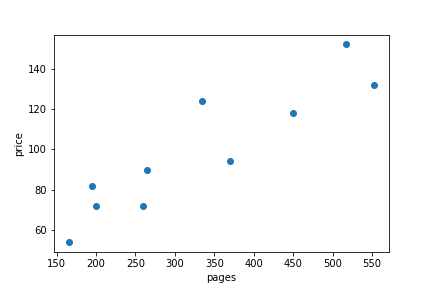
    </td>
  </tr>
  <tr>
    <td align="center">166</td>
    <td align="center">54</td>
  </tr>
  <tr>
    <td align="center">195</td>
    <td align="center">82</td>
  </tr>
  <tr>
    <td align="center">200</td>
    <td align="center">72</td>
  </tr>
  <tr>
    <td align="center">260</td>
    <td align="center">72</td>
  </tr>
  <tr>
    <td align="center">265</td>
    <td align="center">90</td>
  </tr>
  <tr>
    <td align="center">335</td>
    <td align="center">124</td>
  </tr>
  <tr>
    <td align="center">370</td>
    <td align="center">94</td>
  </tr>
  <tr>
    <td align="center">450</td>
    <td align="center">118</td>
  </tr>
  <tr>
    <td align="center">517</td>
    <td align="center">152</td>
  </tr>
  <tr>
    <td align="center">552</td>
    <td align="center">132</td>
  </tr>
</table>


What we want is to get the least square line that fits the data.

That is, we want to find the coefficients $c_1$ and $c_2$ of a linear function $f(x) = c_1 + c_2 x$ such that, mean squared error $J = \frac{1}{n} \left\|f(a)-b\right\|^2 $ is minimized.

Now we know from the lecture that the values of $c_1$ and $c_2$ for which $J$ is minimum is given by,
$$c_1 = avg(b) - avg(a)c_2 \text{ and } c_2 = \rho std(b)/std(a)$$

You are to use the procedure below to find and plot the least square line for the above data.


## **Procedure:**

#### **1. Import necessary packages:**
To read the data from csv file we will use a python package named **"pandas"**. To start working with pandas we first need to import it. We will also import other necessary packages that will be needed for this lab exercise.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### **2. Upload and load dataset:**
At first we have to upload the dataset to google colab to start working with it. Please download the **"bookprice.csv"** dataset from piazza resourse or [click here](https://drive.google.com/file/d/1CVAFMl9xaIC9IGq9Fq-B6JHq1tHuhcbI/view?usp=sharing) to download it. Then click on files form sidebar, drag and drop your file to side bar to upload the dataset.

Now, use `data = pd.read_csv("bookprice.csv")` to load the data.


In [ ]:
data = pd.read_csv("bookprice.csv")
print(data)

     a    b
0  166   54
1  195   82
2  200   72
3  260   72
4  265   90
5  335  124
6  370   94
7  450  118
8  517  152
9  552  132


#### **3. Seperate the data:**
You can use simple indexing (**i.e.** `data['a']`) to seperate the data into a, b. By default this will return a panda dataset. To convert it to numpy array use `to_numpy()` method.

In [ ]:
a = data['a'].to_numpy()
b = data['b'].to_numpy()
print(a)
print(b)

[166 195 200 260 265 335 370 450 517 552]
[ 54  82  72  72  90 124  94 118 152 132]


#### **4. Plot the data:**
Draw a scatter plot using `plt.scatter(a, b)`

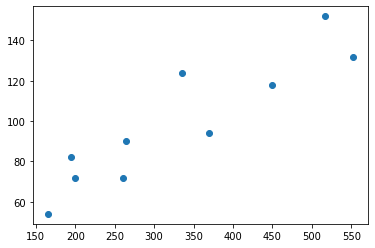

In [ ]:
plt.scatter(a, b)

#### **5. Find the value of $c_1$ and $c_2$:**
1.   First compute the demean vectors $\tilde{a}$ and $\tilde{b}$
2.   Use the demeaned vectors $\tilde{a}$ and $\tilde{b}$ to compute $\rho$, $std(a)$, and $std(b)$
3.   Use the equation given in problem statement to find the value of $c_1$ and $c_2$

[**Note:** The values you should get are $c_1 = 31.2181$ and $c_2 = 0.2048$]

In [ ]:
asize = a.size
onea = np.ones((asize))


suma = np.dot(onea,a)
avga = suma/asize
print(avga)


bsize = b.size
oneb = np.ones((bsize))


sumb = np.dot(oneb,b)
avgb = sumb/asize
print(avgb)

a_till = a - (avga*onea)
b_till = b - (avgb*oneb)

print(a_till)
print(b_till)

atill_dot = np.dot(a_till, a_till)
stda = (atill_dot/ asize)**(1/2)

btill_dot = np.dot(b_till, b_till)
stdb = (btill_dot/ bsize)**(1/2)

print(stda)
print(stdb)

atill_norm = atill_dot**(1/2)
btill_norm = btill_dot**(1/2)

row = (np.dot(a_till ,b_till))/ ( atill_norm * btill_norm)

print(row)

c2 = (row * stdb)/stda
c1 = avgb - (avga * c2)

print(c1)
print(c2)








331.0
99.0
[-165. -136. -131.  -71.  -66.    4.   39.  119.  186.  221.]
[-45. -17. -27. -27.  -9.  25.  -5.  19.  53.  33.]
130.92516946714258
29.60067566796407
0.9057473931307639
31.218126874117644
0.2047790728878621


#### **6. Generate and fit data:**
Use `np.linspace()` method to generate some data (page numbers) and plot the least square fit line (price) on the scatter plot. The graph of the fitted line should look like the following figure:

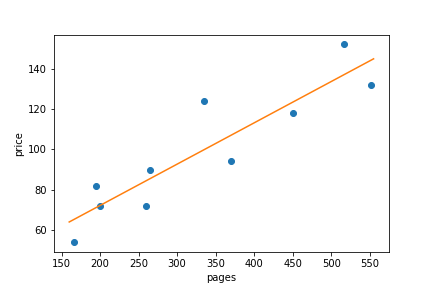


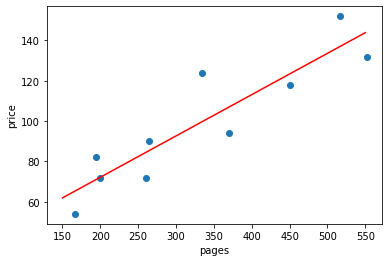

In [ ]:
plt.scatter(a, b)
x = np.linspace(150, 550, num=9)
y = c1 + c2*x
plt.plot(x,y, "r")
plt.xlabel("pages")
plt.ylabel("price")
plt.show()

#### **7. Using numpy function: polyfit():**
Numpy has its own polynomial fit function called polyfit. Use `np.polyfit(a, b, 1)` to get the coffecients (make sure you understand the order of the coefficients produced).


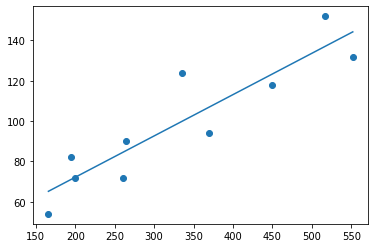

In [ ]:
plt.scatter(a,b)
m,c = np.polyfit(a,b,1)
plt.plot(a,m*a+c)

#### **8. Plot the quadratic polynomial:**
The Last argument in the `np.polyfit()` function should be 1 if you want a fit a linear function. It can be some other number which will indicate the degree of the polynomial you want to fit. Plot the quadratic polynomial that fits the data.


In [ ]:
# Write appropriate code here

#### **9. Goodness of fit: $r^2$ statistic:**
A commonly used statistic that is related to the error, but is not the same as the error is the goodness-of-fit $r^2$ (r-squared) statistic. The $r^2$ statistic ranges from a value of $0$ for absolutely no relation between
the data and the line to a value of $1$ which occurs only if all of the data fall exactly on the line, **i.e.**, no error. In some engineering disciplines, an equation fitted to data is acceptable only if $r^2 > 0.9$. Other
engineering disciplines might find an $r^2$ low as $0.7$ acceptable for use.

The $r^2$ statistic is computed as follows:


$r^2 = 1 - SSE / SST$, where $SSE$ is the sum of squared errors: $(b - \text{b_pred})^T(b - \text{b_pred})$ and $SST = \text{Total sum of squares : } (b - avg(b))^T(b - avg(b))$


Find the **SSE** and **SST** values for the given data and the value of $r^2$ statistic.


In [ ]:
sst = np.dot(b_till, b_till)
error = b - ((c1*onea) + (c2*a))
sse = np.dot(error, error)
r_sqr = 1 - (sse/sst)
print(r_sqr)

0.8203783401631748


#### **10. Displaying the equation on the graph:**
1.   Create a string that contains the equation. You can insert a number to a string and formate as follow: `eqn = 'y = %.2f + %.2fx' %(c_1, c_2)`
2.   Use `plt.text(Xcor, Ycor, 'string'`) to display the equation on the graph.


## **Exercise:**
A healthy child’s systolic blood pressure p (in millimeters of mercury) and weight w (in pounds) are approximately related by the equation,

$$p = \beta_0 + \beta_1 \log(w)$$


Use the following experimental data to estimate the systolic blood pressure of a healthy child weighing 100 pounds.

<table>
  <tr>
    <td>w</td>
    <td>44</td>
    <td>61</td>
    <td>81</td>
    <td>113</td>
    <td>131</td>
  </tr>

  <tr>
    <td>p</td>
    <td>91</td>
    <td>98</td>
    <td>103</td>
    <td>110</td>
    <td>112</td>
  </tr>
</table>

82.44821981424148
0.23664860681114555


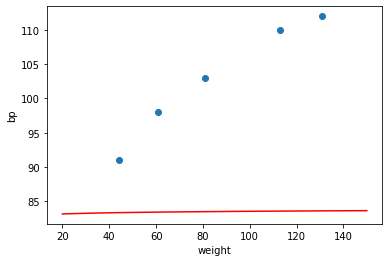

In [ ]:
from pandas._libs.algos import pad_2d_inplace
w = np.array([44, 61,81,113,131])
p = np.array([91, 98,103,110, 112])

wsize = w.size
onew = np.ones((wsize))

sumw = np.dot(onew,w)
avgw = sumw/wsize

psize = p.size
onep = np.ones((psize))

sump = np.dot(onep,p)
avgp = sump/psize

w_till = w - (avgw*onew)
p_till = p - (avgp*onep)

wtill_dot = np.dot(w_till, w_till)
stdw = (wtill_dot/ wsize)**(1/2)

ptill_dot = np.dot(p_till, p_till)
stdp = (ptill_dot/ psize)**(1/2)

wtill_norm = wtill_dot**(1/2)
ptill_norm = ptill_dot**(1/2)

row = (np.dot(w_till ,p_till))/ ( wtill_norm * ptill_norm)

c2 = (row * stdp)/stdw
c1 = avgp - (avgw * c2)

print(c1)
print(c2)

plt.scatter(w, p)
x = np.linspace(20, 150, num=10)
y = c1 + (c2*(np.log(x)))
plt.plot(x,y, "r")
plt.xlabel("weight")
plt.ylabel("bp")
plt.show()
